In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os
import requests
import re #regular expressions
from bs4 import BeautifulSoup
from itertools import chain
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Web Scraping and Visualization with WordCloud

## Project Description

In this Project the following topics are covered:<br>
Web Scraping lyrics of an artist.<br>
Apply NLP technics like a Beautiful Soup, Regex, wordcloud, Bag of Words.<br>
Visualization of a lyrics Corpus generating a WordCloud in the shape of a guitar.

### First Artist: PJ Harvey

### First steps, extract the artist page

In [3]:
base_url = 'www.lyrics.com'

In [4]:
url  = 'http://www.lyrics.com/artist/PJ-Harvey'

In [5]:
response = requests.get(url)

In [6]:
response

<Response [200]>

In [7]:
response.status_code

200

In [8]:
pjh_html = response.text

In [9]:
with open('../data/pj_harvey/pjh.txt', "w") as f:
    f.write(pjh_html)

In [10]:
with open('../data/pj_harvey/pjh.txt', "r") as fArtist:
    fContent = fArtist.read()

### Define a Beautiful Soup of the Artist Page

In [11]:
pjh_soup = BeautifulSoup(fContent, "html.parser")

In [12]:
print(pjh_soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   PJ Harvey Lyrics, Songs and Albums | Lyrics.com
  </title>
  <meta content="PJ Harvey Lyrics - All the great songs and their lyrics from PJ Harvey on Lyrics.com" name="description"/>
  <meta content="PJ Harvey lyrics, PJ Harvey song lyrics, PJ Harvey lyric" name="keywords"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <base href="https://www.lyrics.com/"/>
  <script>
   s4Prefix = 'https://static.stands4.com';
version = '1.3.87';
  </script>
  <!-- Bootstrap compiled and minified CSS -->
  <link href="https://maxcdn.bo

### Extract the links to the particular albums


These links are always inside an \<h3> tag with the attribute class="artist-album-label".

In [13]:
album_labels = pjh_soup.find_all(class_='artist-album-label')

In [14]:
len(album_labels)

132

List of all elements with album links:

In [15]:
album_labels

[<h3 class="artist-album-label"><a href="/album/3611504/Women-With-Attitude">Women With Attitude</a> <span class="year">[2017]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3305033/Hope-Six-Demolition-Project-%5BLP%5D">Hope Six Demolition Project [LP]</a> <span class="year">[2016]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3326676/The-Community-of-Hope">The Community of Hope</a> <span class="year">[2016]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3302621/The-Hope-Six-Demolition-Project">The Hope Six Demolition Project</a> <span class="year">[2016]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3337705/The-Orange-Monkey">The Orange Monkey</a> <span class="year">[2016]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3298410/The-Wheel">The Wheel</a> <span class="year">[2016]</span></h3>,
 <h3 class="artist-album-label"><a href="/album/3201104/She-Who-Rocks">She Who Rocks</a> <span class="year">[2015]</span></h3>

Examining the elements on the list:

In [16]:
album_labels[0]

<h3 class="artist-album-label"><a href="/album/3611504/Women-With-Attitude">Women With Attitude</a> <span class="year">[2017]</span></h3>

In [17]:
album_labels[0].a

<a href="/album/3611504/Women-With-Attitude">Women With Attitude</a>

In [18]:
album_labels[0].attrs

{'class': ['artist-album-label']}

In [19]:
print(album_labels[0].string)

None


In [20]:
album_labels[0].a.attrs

{'href': '/album/3611504/Women-With-Attitude'}

In [21]:
album_labels[0].a.string

'Women With Attitude'

In [22]:
'Women With Attitude' in album_labels[0].a

True

### Transform the labels list into a list with link elements

The link elements \<a> are child elements of the previous \<h3> elements:

In [23]:
album_links=[]
for label in album_labels:
    if label.a !=None:
        album_links.append(label.a)    

In [24]:
len(album_links)

131

In [25]:
album_links

[<a href="/album/3611504/Women-With-Attitude">Women With Attitude</a>,
 <a href="/album/3305033/Hope-Six-Demolition-Project-%5BLP%5D">Hope Six Demolition Project [LP]</a>,
 <a href="/album/3326676/The-Community-of-Hope">The Community of Hope</a>,
 <a href="/album/3302621/The-Hope-Six-Demolition-Project">The Hope Six Demolition Project</a>,
 <a href="/album/3337705/The-Orange-Monkey">The Orange Monkey</a>,
 <a href="/album/3298410/The-Wheel">The Wheel</a>,
 <a href="/album/3201104/She-Who-Rocks">She Who Rocks</a>,
 <a href="/album/3293549/Triple-J%3A-40-Years-of-Music">Triple J: 40 Years of Music</a>,
 <a href="/album/3094283/BBC-Radio-6-Music%E2%80%99s-Alternative-Jukebox">BBC Radio 6 Music’s Alternative Jukebox</a>,
 <a href="/album/2754261/Bernard-lenoir-l%27inrockuptible">Bernard lenoir l'inrockuptible</a>,
 <a href="/album/2459986/RMF-Styl">RMF Styl</a>,
 <a href="/album/2103701/Let-England-Shake">Let England Shake</a>,
 <a href="/album/2334073/Let-England-Shake%3A-12-Short-Films-b

The following would extract just all the links on the page:

In [26]:
pjh_links = pjh_soup.find_all('a')
pjh_links

[<a href="login.php">Login</a>,
 <a href="https://www.abbreviations.com/">ABBREVIATIONS</a>,
 <a href="https://www.anagrams.net/">ANAGRAMS</a>,
 <a href="https://www.biographies.net/">BIOGRAPHIES</a>,
 <a href="https://www.calculators.net/">CALCULATORS</a>,
 <a href="https://www.convert.net/">CONVERSIONS</a>,
 <a href="https://www.definitions.net/">DEFINITIONS</a>,
 <a href="https://www.grammar.com/">GRAMMAR</a>,
 <a href="https://www.literature.com/">LITERATURE</a>,
 <a href="https://www.lyrics.com/">LYRICS</a>,
 <a href="https://www.phrases.com/">PHRASES</a>,
 <a href="https://www.poetry.com/">POETRY</a>,
 <a href="https://www.quotes.net/">QUOTES</a>,
 <a href="https://www.references.net/">REFERENCES</a>,
 <a href="https://www.rhymes.com/">RHYMES</a>,
 <a href="https://www.scripts.com/">SCRIPTS</a>,
 <a href="https://www.symbols.com/">SYMBOLS</a>,
 <a href="https://www.synonyms.com/">SYNONYMS</a>,
 <a href="https://www.uszip.com/">USZIP</a>,
 <a href="/artists/0">#</a>,
 <a href="/ar

### Determining Artist Albums 

List of albums: we only want to extract main albums<br>
Extra option: extract this list from Wikipedia

In [27]:
pjh_album_list=['Dry','Rid of Me','To Bring You My Love','Is This Desire?','Stories from the City, Stories from the Sea',
                'Uh Huh Her','White Chalk','Let England Shake','The Hope Six Demolition Project']

In [28]:
#pjh_album_list = list(map(str.title,pjh_album_list))

In [29]:
pjh_album_list

['Dry',
 'Rid of Me',
 'To Bring You My Love',
 'Is This Desire?',
 'Stories from the City, Stories from the Sea',
 'Uh Huh Her',
 'White Chalk',
 'Let England Shake',
 'The Hope Six Demolition Project']

### Filter album links list with the selected albums

In [30]:
album_links[103].string

'To Bring You My Love'

In [31]:
pjh_album_list[2]

'To Bring You My Love'

In [32]:
album_links_red=[]

In [33]:
# match defined albums with the albums in the links list
for album in pjh_album_list:
    for link in album_links:
        if link.string==album:
            album_links_red.append(link)

This is now the working list for the artist:

In [34]:
album_links_red

[<a href="/album/79155/Dry">Dry</a>,
 <a href="/album/170348/Rid-of-Me">Rid of Me</a>,
 <a href="/album/209249/To-Bring-You-My-Love">To Bring You My Love</a>,
 <a href="/album/373571/Is-This-Desire%3F">Is This Desire?</a>,
 <a href="/album/503552/Stories-from-the-City%2C-Stories-from-the-Sea">Stories from the City, Stories from the Sea</a>,
 <a href="/album/692552/Uh-Huh-Her">Uh Huh Her</a>,
 <a href="/album/1208861/White-Chalk">White Chalk</a>,
 <a href="/album/2103701/Let-England-Shake">Let England Shake</a>,
 <a href="/album/3302621/The-Hope-Six-Demolition-Project">The Hope Six Demolition Project</a>]

In [35]:
album_links_red[3].get('href')

'/album/373571/Is-This-Desire%3F'

Here are the links we need:

In [36]:
links_pjh = list(map(lambda link: link.get('href'),album_links_red))
links_pjh

['/album/79155/Dry',
 '/album/170348/Rid-of-Me',
 '/album/209249/To-Bring-You-My-Love',
 '/album/373571/Is-This-Desire%3F',
 '/album/503552/Stories-from-the-City%2C-Stories-from-the-Sea',
 '/album/692552/Uh-Huh-Her',
 '/album/1208861/White-Chalk',
 '/album/2103701/Let-England-Shake',
 '/album/3302621/The-Hope-Six-Demolition-Project']

In [37]:
album_links_red[0].get('href')

'/album/79155/Dry'

### Create album folder and download html of each album page

In [104]:
#function: gets one album link as a link element <a>
def download_album(link, artist_path):
    """
    Creates an album folder
    Requests album page html
    Saves it as .txt in the data folder
    """
    album_address = link.get('href')
    album_name = link.string
    
    # remove special characters
    album_name = re.sub('\.|,|\?','',album_name)
    
    # folder names convention
    folder_name = album_name.lower().replace(' ','_')
    
    folder_path = artist_path + folder_name + '/'
    if os.path.exists(folder_path) == False:
        os.mkdir(folder_path)
        
    album_html = requests.get('http://'+base_url+album_address).text
    with open(artist_path+folder_name+'.txt',"w") as fAlbum:
        fAlbum.write(album_html)

In [105]:
# PJ Harvey
pjh_path = '../data/pj_harvey/'

for link in album_links_red:
    download_album(link,pjh_path)

In [48]:
os.listdir('../data/pj_harvey')

['dry',
 'is_this_desire',
 'let_england_shake',
 'pjh.txt',
 'rid_of_me',
 'stories_from_the_city,_stories_from_the_sea',
 'the_hope_six_demolition_project',
 'to_bring_you_my_love',
 'uh_huh_her',
 'white_chalk']

In [109]:
one_folder = next(os.walk('../data/pj_harvey'))[1][0]
one_folder

'dry'

In [110]:
with open (pjh_path+one_folder+'.txt', 'r') as fAlbum:
    fContent = fAlbum.read()
    album_soup = BeautifulSoup(fContent, "html.parser")
    strong_elements = album_soup.find_all('strong')

In [111]:
strong_elements[1]

<strong><a href="/lyric/1562868/Oh+My+Lover">Oh My Lover</a></strong>

In [112]:
strong_elements[1].a.get('href')

'/lyric/1562868/Oh+My+Lover'

In [113]:
strong_elements[1].a.string

'Oh My Lover'

In [117]:
#function: gets one album folder and the relative path to the folder 
def download_songs(folder, artist_path):    
    """
    Opens album.txt in the folder with album html
    Converts it into a Beautiful Soup to extract song addresses and names
    Iterates through the folder songs to save the song html in the album folder
    """
    folder_path = artist_path + folder
    
    with open (artist_path+folder+'.txt', 'r') as fAlbum:
        fContent = fAlbum.read()
        album_soup = BeautifulSoup(fContent, "html.parser")
        strong_elements = album_soup.find_all('strong')
    
    for element in strong_elements:
        if element.a != None:
            if element.a.get('href')[1:6]=='lyric':
                song_address = element.a.get('href')
                
                # remove special characters
                song_name = re.sub('\.|,|\?','',element.a.string)
                #song_name = re.sub('&','and',song_name)
                
                # file names convention
                song_name = re.sub('\s|-','_',song_name)
                song_name =song_name.lower()
                
                song_html = requests.get('http://'+base_url+song_address).text
                with open(folder_path+'/'+song_name+'.txt',"w") as fSong:
                    fSong.write(song_html)

In [6]:
# PJ Harvey
pjh_path = '../data/pj_harvey/'
pjh_dirs = next(os.walk(pjh_path))[1]

In [119]:
for folder in pjh_dirs:
    download_songs(folder,pjh_path)

os.walk is necessary because os.listdir delivers files and folder and we need only underfolders

next() is needed to access the 3 tuples generated by os.walk

In [7]:
os.walk(pjh_path)

<generator object _walk at 0x000001E2D249E350>

In [10]:
next(os.walk(pjh_path))[0]

'../data/pj_harvey/'

In [17]:
next(os.walk(pjh_path))[1]

['dry',
 'is_this_desire',
 'let_england_shake',
 'rid_of_me',
 'stories_from_the_city_stories_from_the_sea',
 'the_hope_six_demolition_project',
 'to_bring_you_my_love',
 'uh_huh_her',
 'white_chalk']

In [12]:
next(os.walk(pjh_path))[2]

['dry.txt',
 'is_this_desire.txt',
 'let_england_shake.txt',
 'pjh.txt',
 'rid_of_me.txt',
 'stories_from_the_city_stories_from_the_sea.txt',
 'the_hope_six_demolition_project.txt',
 'to_bring_you_my_love.txt',
 'uh_huh_her.txt',
 'white_chalk.txt']

In [13]:
os.listdir(pjh_path) #includes all subfolders and files

['dry',
 'dry.txt',
 'is_this_desire',
 'is_this_desire.txt',
 'let_england_shake',
 'let_england_shake.txt',
 'pjh.txt',
 'rid_of_me',
 'rid_of_me.txt',
 'stories_from_the_city_stories_from_the_sea',
 'stories_from_the_city_stories_from_the_sea.txt',
 'the_hope_six_demolition_project',
 'the_hope_six_demolition_project.txt',
 'to_bring_you_my_love',
 'to_bring_you_my_love.txt',
 'uh_huh_her',
 'uh_huh_her.txt',
 'white_chalk',
 'white_chalk.txt']

Extract lyrics from files with html list

In [14]:
# with one song
# with one order
# with a the path of the orders that maintains the flexibility to use other artists
# add flexiblity to choose the size of the corpus n=number of albums

In [ ]:
# with one

In [19]:
next(os.walk(pjh_path))[1]

['dry',
 'is_this_desire',
 'let_england_shake',
 'rid_of_me',
 'stories_from_the_city_stories_from_the_sea',
 'the_hope_six_demolition_project',
 'to_bring_you_my_love',
 'uh_huh_her',
 'white_chalk']

In [17]:
def lyrics_corpus(artist_path,artist_dirs):
    lyrics_list=[]
    
    # loop through album folders
    for folder in artist_dirs:       
        song_files = os.listdir(artist_path+folder)
        
        # loop
        for file in song_files:
            with open (artist_path+folder+'/'+file) as fSong:
                fContent = fSong.read()
            song_soup = BeautifulSoup(fContent, "html.parser")
            #lyrics = re.sub('\n',' ',song_soup.pre.text)
            lyrics = (song_soup.pre.text)
            lyrics_tidy = lyrics.replace ('\n',' ')
            lyrics_list.append(lyrics_tidy)
    return lyrics_list

In [21]:
# PJ Harvey
pjh_path = '../data/pj_harvey/'
pjh_dirs = next(os.walk(pjh_path))[1]

In [22]:
next(os.walk(pjh_path))[1][0]

'dry'

In [23]:
pjh_corpus = lyrics_corpus(pjh_path,pjh_dirs)

In [72]:
print(pjh_corpus[3])

She'd burst  Dropped off  Picked the fruit  Realise  I'm naked  I'm naked, too    So cover my body  Dress it fine  Hide my linen and lace  Been sewing ever since  Since time began    More than the hills  More than the trees  More than the mountains, you  More than I can see  In front of me  More than the mountains, you    So fruit flower myself inside out  I'm happy and bleeding for you  Fruit flower myself inside out  I'm tired and I'm bleeding for you    This fruit was bruised  Dropped off and blue  Out of season, happy I'm bleeding  Long overdue  Too early and it's late, too  Too early and it's late, too  Mind and body  I would and I would not do    Fruit flower myself inside out  I'm happy and bleeding for you  Fruit flower myself inside out  I'm tired and I'm bleeding for you    Fig fruit flower myself inside out for you  Fig fruit flower myself inside out for you  Fig fruit flower myself inside out for you  Fig fruit flower myself inside out for you  Fig fruit flower myself insid

## WordCloud of PJ Harvey's lyrics

In [131]:
STOPWORDS.add('oh')

In [101]:
mask_image = np.array(Image.open('electric-guitar.jpg'))

In [102]:
cloud_text = ''.join(chain.from_iterable(pjh_corpus))

In [128]:
cloud = wordcloud.WordCloud(background_color='rgba(255, 255, 255, 0)', # transparent background
                            mode='RGBA',
                            max_words=100,
                            stopwords=STOPWORDS,
                            mask=mask_image,
                            collocations=False, #calculates frequencies
                            contour_color='steelblue').generate(cloud_text)

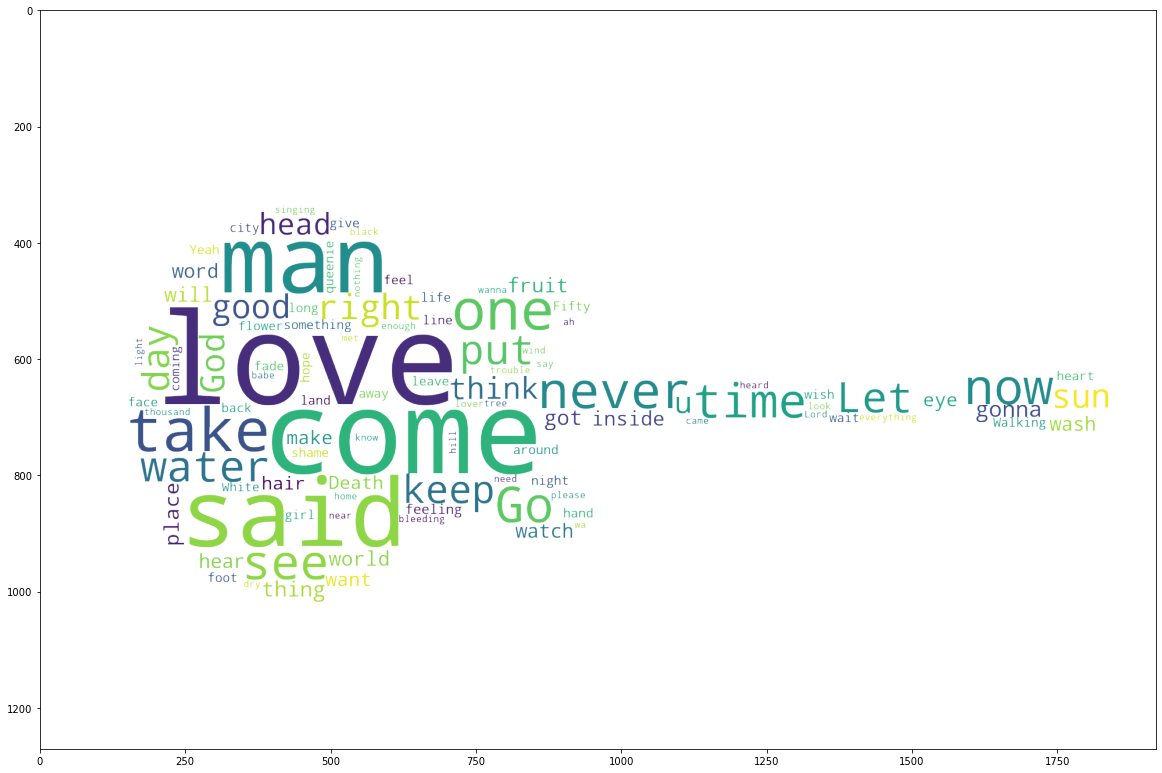

In [129]:
plt.figure(figsize=(20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('cloud.png')
plt.show()

In [82]:
### corpus

In [84]:
# list where each element is a song
corpus = pjh_corpus

In [88]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

In [92]:
tf = TfidfTransformer()
transformed = tf.fit_transform(X)
transformed

<109x1728 sparse matrix of type '<class 'numpy.float64'>'
	with 4034 stored elements in Compressed Sparse Row format>

In [93]:
tdf = pd.DataFrame(transformed.todense(), columns=vectorizer.get_feature_names())
tdf.head(3).round(2)

,000,17,509,abe,abraham,aches,aching,acres,acting,adam,...,years,yep,yes,york,young,younger,yuri,ze,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
